# CS360 - Machine Learning
## Assignment 7

### Cluster the IRIS dataset using the k-means algorithm.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(91)

In [3]:
# Cluster Prototype (centroids) Initialization done using the K-Mean++ Algorithm, David Arthur and Sergei Vassilvitskii 2007

class kMeans():
  def __init__(self, dimension, k):
    self._dimension = dimension
    self._clusters = k
    self._prototypes = np.zeros((k, dimension))

  def __sample_with_prob(self, sample_space, probability, num_samples=1):
    idx = [i for i in range(sample_space.shape[0])]
    pos = np.random.choice(idx, p=probability)

    return sample_space[pos]

  def __initialize_prototypes(self, X):
    probs = None
    center = self.__sample_with_prob(X, probs)
    self._prototypes[0, :] = center

    for i in range(1, self._clusters):
      probs = self.__nearest_cluster_dist(X, i)
      probs = [j ** 2 for j in probs]
      tot = sum(probs)
      probs = [j/tot for j in probs]
      center = self.__sample_with_prob(X, probs)
      self._prototypes[i, :] = center

  def __nearest_cluster_dist(self, X, i=None, clust_assign=False):
    if i is not None:
      prototypes = self._prototypes[0:i, :]
    else:
      prototypes = self._prototypes
    dists = list()
    for x in X:
      temp = []
      for cluster in prototypes:
        temp.append(np.linalg.norm(x - cluster))
      if clust_assign:
        dists.append(np.argmin(temp))
      else:
        dists.append(np.min(temp))
    return dists

  def __cluster_means(self, X, c):
    c = np.array(c)
    centroids = np.zeros(self._prototypes.shape)
    for k in range(self._clusters):
      cluster_group = X[c == k, :]
      centroids[k, :] = cluster_group.mean(axis=0)
    return centroids

  def __SSE(self, X, c):
    sse = 0
    for i, x in enumerate(X):
      sse += np.linalg.norm(x - self._prototypes[c[i]]) ** 2
    return sse

  def fit(self, X, max_iterations=3000):
    self.__initialize_prototypes(X)
    current = self._prototypes

    for i in range(max_iterations):
    # while True:
      c = self.__nearest_cluster_dist(X, clust_assign=True)
      centroids = self.__cluster_means(X, c)
      
      if np.array_equal(centroids, self._prototypes):
        # print(f"Converged in {i+1} iterations")
        return self.__SSE(X, c)

      self._prototypes = centroids
    
    print(f"Reached Max Iterations but not converged.")
    return self.__SSE(X, c)

In [4]:
X, _ = load_iris(return_X_y=True)
SSE = list()

for k in range(2, 11):
  model = kMeans(X.shape[1], k)
  sse = model.fit(X)
  SSE.append(sse)
  print(f"K: {k}, SSE = {sse}")

K: 2, SSE = 152.34795176035803
K: 3, SSE = 78.85566582597724
K: 4, SSE = 57.350880212954756
K: 5, SSE = 49.822278409090906
K: 6, SSE = 45.853839459391196
K: 7, SSE = 36.990312505623045
K: 8, SSE = 32.09654790385055
K: 9, SSE = 29.418672494172505
K: 10, SSE = 27.363081649852823


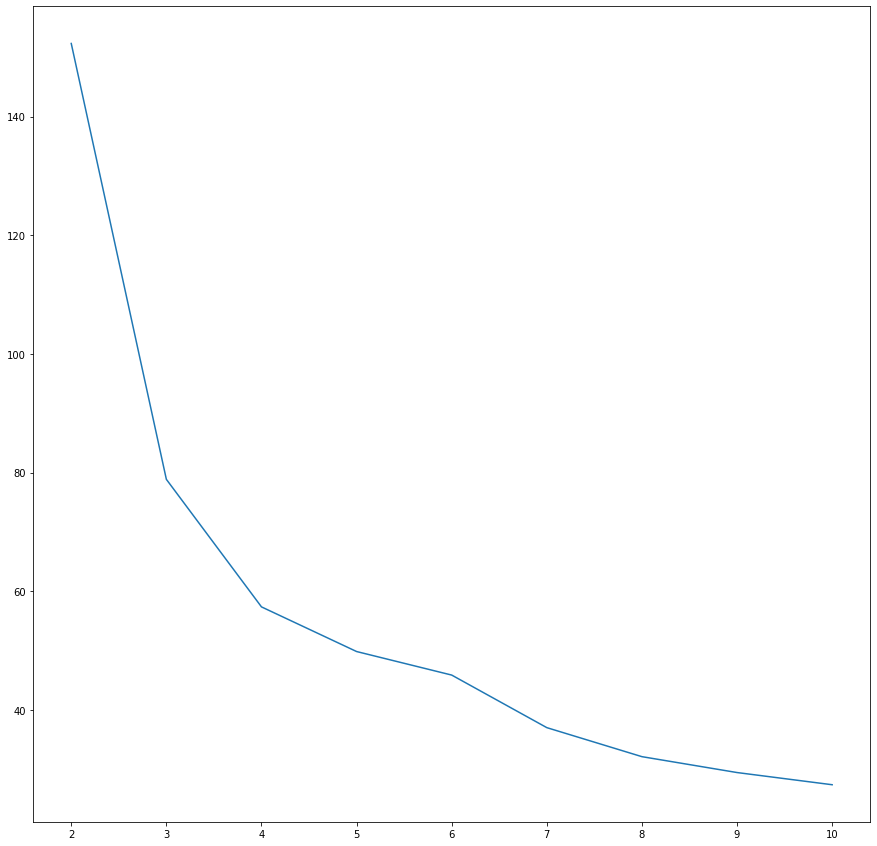

In [5]:
plt.figure(figsize=(15, 15))
plt.plot([i for i in range(2, 11)], SSE)

#### By the elbow method we will choose k=3 as there is no significant reduction in SSE after that.

### Repeat previous experiments for k-means using a library implementations.

In [6]:
SSE = list()

for k in range(2, 11):
  model = KMeans(n_clusters=k, random_state=13, max_iter=3000).fit(X)
  sse = model.inertia_
  SSE.append(sse)
  print(f"K: {k}, SSE = {sse}")

K: 2, SSE = 152.34795176035792
K: 3, SSE = 78.85144142614601
K: 4, SSE = 57.228473214285714
K: 5, SSE = 46.44618205128205
K: 6, SSE = 39.066035353535355
K: 7, SSE = 34.299712121212124
K: 8, SSE = 29.98894395078606
K: 9, SSE = 28.29394395078606
K: 10, SSE = 26.38707318473468


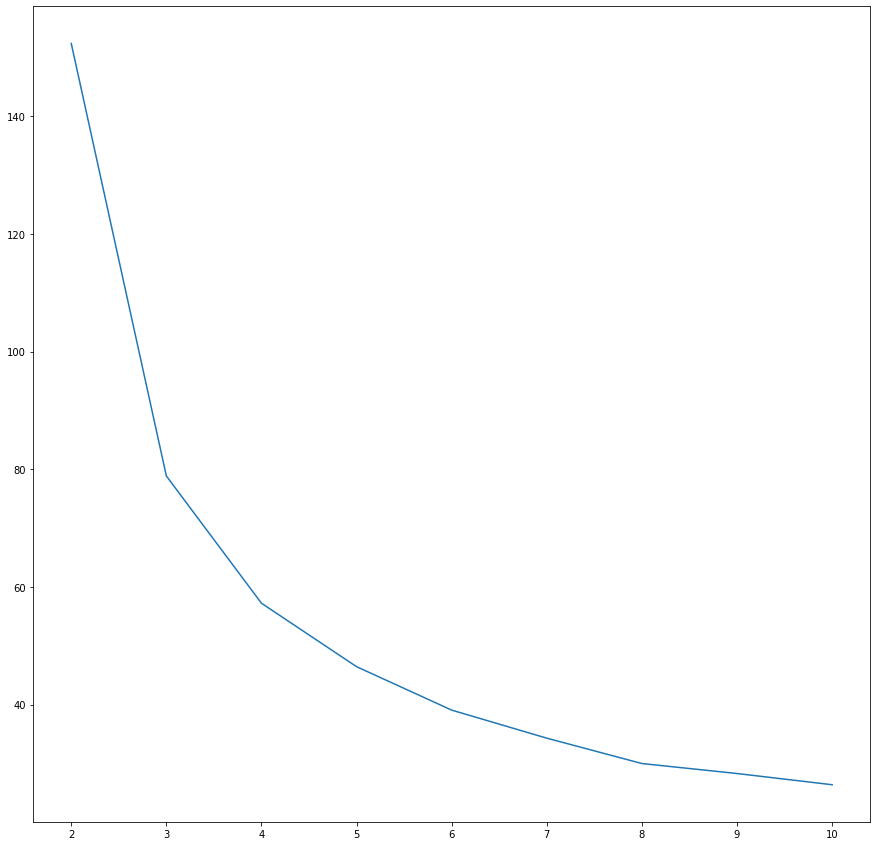

In [7]:
plt.figure(figsize=(15, 15))
plt.plot([i for i in range(2, 11)], SSE)

#### Using the sci-kit learn implementation of k-Means gives results that corroborate with my implementation. Slight variances are present as k-Means can converge to a local minima depending on the random initalization of the cluster prototypes